# Churn Modelling Classification

***
_**Importing the required libraries & packages**_

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import pickle
import ydata_profiling as pf
plt.rcParams['figure.figsize']=20,14
import warnings
warnings.filterwarnings('ignore')

_**Changing The Default Working Directory Path & Reading the Dataset using Pandas Command**_

In [2]:
os.chdir('C:\\Users\\Shridhar\\OneDrive\\Desktop\\Top Mentor\\Batch 74 Day 20')
df=pd.read_csv('Churn_Modelling.csv')

## Data Cleaning:
_**Dropping the column which is not needed for model fitting**_

In [3]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

_**Automated Exploratory Data Analysis (EDA) with ydata_profiling(pandas_profiling)**_

In [4]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

_**Label Encoding the <span style= "color:green">Gender</span> column**_

In [5]:
df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes

_**One Hot Encoding the <span style = "color:green"> Geography </span> column using pandas get dummies command**_

In [6]:
geo=pd.get_dummies(df['Geography'],drop_first=True)
df=pd.concat([geo,df],axis=1)

_**Dropping out the <span style = "color:green"> Geography </span> column after one hot encoding**_

In [7]:
df.drop(['Geography'],axis=1,inplace=True)

_**Assigning the dependent and independent variable**_

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

## Data Preprocessing:
_**Standardizing the independent variable of the dataset**_

In [9]:
sc=StandardScaler()
x=sc.fit_transform(x)

## Model Fitting:

_**Defining the Function for the ML algorithms using GridSearchCV Algorithm and splitting the dependent variable & independent variable into training and test dataset and Predicting the Dependent Variable by fitting the given model and create the pickle file of the model with the given Algo_name. Further getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.**_

In [10]:
def FitModel(x,y,algo_name,algorithm,gridsearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    grid=GridSearchCV(estimator=algorithm,param_grid=gridsearchParams,cv=cv,
                     scoring='accuracy', verbose=0,n_jobs=-1)
    grid_result = grid.fit(x_train,y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict (x_test)
    pickle.dump(grid_result,open(algo_name,'wb'))
    print('Algorithm Name :',algo_name)
    print ('\n Best Params :', best_params)
    print ('\n Classification Report :\n',classification_report(y_test,pred))
    print ('\n Accuracy Score {}%'.format(100* accuracy_score(y_test,pred)))
    print ('\n Confusion Matrix :\n',confusion_matrix(y_test,pred))


_**Running the function with some appropriate parameters and fitting the Support Vector Machine Classifiers Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name SVC.**_

In [11]:
param= {'C':[0.1,1,10,100,1000],
       'gamma':[0.0001,0.001,0.1,1,3,5,10,100]}
FitModel(x,y,'SVC',SVC(),param,cv=10)

Algorithm Name : SVC

 Best Params : {'C': 1000, 'gamma': 0.001}

 Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      2376
           1       0.87      0.35      0.50       624

    accuracy                           0.85      3000
   macro avg       0.86      0.67      0.71      3000
weighted avg       0.86      0.85      0.83      3000


 Accuracy Score 85.43333333333332%

 Confusion Matrix :
 [[2343   33]
 [ 404  220]]


_**Running the function with some appropriate parameters and fitting the Random Forest Classifiers Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name Random Forest.**_

In [12]:
param = {'n_estimators':[500,600,800,1000],
        'criterion':['entropy','gini']}
FitModel(x,y,'Random Forest',RandomForestClassifier(),param,cv=7)

Algorithm Name : Random Forest

 Best Params : {'criterion': 'entropy', 'n_estimators': 600}

 Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2376
           1       0.80      0.46      0.58       624

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000


 Accuracy Score 86.26666666666667%

 Confusion Matrix :
 [[2304   72]
 [ 340  284]]


_**Running the function with some appropriate parameters and fitting the XGBoost Classifiers Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name XGBoost.**_

In [13]:
param = {'n_estimators':[555,666,777,888,999]}
FitModel(x,y,'XGBoost',XGBClassifier(),param,cv=5)

Algorithm Name : XGBoost

 Best Params : {'n_estimators': 555}

 Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      2376
           1       0.69      0.47      0.56       624

    accuracy                           0.85      3000
   macro avg       0.78      0.71      0.73      3000
weighted avg       0.83      0.85      0.83      3000


 Accuracy Score 84.6%

 Confusion Matrix :
 [[2243  133]
 [ 329  295]]


_**Running the function with some appropriate parameters and fitting the Extra Tree Classifiers Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name Extra Tree.**_

In [14]:
param = {'n_estimators':[500,600,800,1000],
        'criterion':['entropy','gini'],
        'max_features':['auto','sqrt']}
FitModel(x,y,'Extra Tree',ExtraTreesClassifier(),param,cv=4)

Algorithm Name : Extra Tree

 Best Params : {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 600}

 Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2376
           1       0.81      0.45      0.58       624

    accuracy                           0.86      3000
   macro avg       0.84      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000


 Accuracy Score 86.4%

 Confusion Matrix :
 [[2311   65]
 [ 343  281]]


_**Running the function with empty parameters since the catboost model doesn't need any special parameters and fitting the CatBoost Classifiers Algorithm and getting the Algorithm Name, Empty Parameters of the algorithm, Accuracy Score in percentage format, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name CatBoost.**_

In [15]:
param={}
FitModel(x,y,'CatBoost',CatBoostClassifier(),param,cv=10)

Learning rate set to 0.023648
0:	learn: 0.6734014	total: 138ms	remaining: 2m 18s
1:	learn: 0.6570843	total: 149ms	remaining: 1m 14s
2:	learn: 0.6394229	total: 161ms	remaining: 53.4s
3:	learn: 0.6226598	total: 173ms	remaining: 43s
4:	learn: 0.6080163	total: 184ms	remaining: 36.6s
5:	learn: 0.5937404	total: 195ms	remaining: 32.4s
6:	learn: 0.5809999	total: 204ms	remaining: 29s
7:	learn: 0.5691741	total: 214ms	remaining: 26.5s
8:	learn: 0.5584560	total: 225ms	remaining: 24.8s
9:	learn: 0.5485244	total: 235ms	remaining: 23.3s
10:	learn: 0.5360055	total: 245ms	remaining: 22s
11:	learn: 0.5273351	total: 255ms	remaining: 21s
12:	learn: 0.5175668	total: 264ms	remaining: 20.1s
13:	learn: 0.5089208	total: 274ms	remaining: 19.3s
14:	learn: 0.4998229	total: 286ms	remaining: 18.8s
15:	learn: 0.4902249	total: 296ms	remaining: 18.2s
16:	learn: 0.4835836	total: 308ms	remaining: 17.8s
17:	learn: 0.4758495	total: 319ms	remaining: 17.4s
18:	learn: 0.4688199	total: 329ms	remaining: 17s
19:	learn: 0.462245

_**Running the function with empty parameters since the lightgbm model doesn't need any special parameters and fitting the LGBM Classifiers Algorithm and getting the Algorithm Name, Empty Parameters of the algorithm, Accuracy Score in percentage format, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name LightGBM.**_

In [16]:
param = {}
FitModel(x,y,'LightGBM',LGBMClassifier(),param,cv=10)

Algorithm Name : LightGBM

 Best Params : {}

 Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2376
           1       0.76      0.49      0.60       624

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.76      3000
weighted avg       0.85      0.86      0.85      3000


 Accuracy Score 86.2%

 Confusion Matrix :
 [[2281   95]
 [ 319  305]]


_**Loading the pickle file with the algorithm which gives highest accuracy percentage**_

In [17]:
model=pickle.load(open('Extra Tree','rb'))

_**Predicting the dependent variable using the loaded pickle file and getting the Accuracy Score in percentage format, Classification Report and Confusion Matrix between the predicted values and dependent variable**_

In [18]:
pred1=model.predict(x)
print ('\n Classification Report :\n',classification_report(y,pred1))
print ('\n Accuracy Score {}%'.format(100* accuracy_score(y,pred1)))
print ('\n Confusion Matrix :\n',confusion_matrix(y,pred1))


 Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      7963
           1       0.96      0.83      0.89      2037

    accuracy                           0.96     10000
   macro avg       0.96      0.91      0.93     10000
weighted avg       0.96      0.96      0.96     10000


 Accuracy Score 95.92%

 Confusion Matrix :
 [[7898   65]
 [ 343 1694]]


_**Making the Predicted value as a new dataframe and concating it with the given data**_

In [19]:
prediction=pd.DataFrame(pred1,columns=['Prediction of Exited(Approx.)'])
pred_df=pd.concat([df,prediction],axis=1)

_**Exporting the Data With Prediction of Exited to a csv file**_

In [20]:
pred_df.to_csv('Predicted Churn Modelling.csv',index=False)

_**Plotting the line graph to represent the Accuracy between Predicted value and Actual Value and saving the PNG file**_

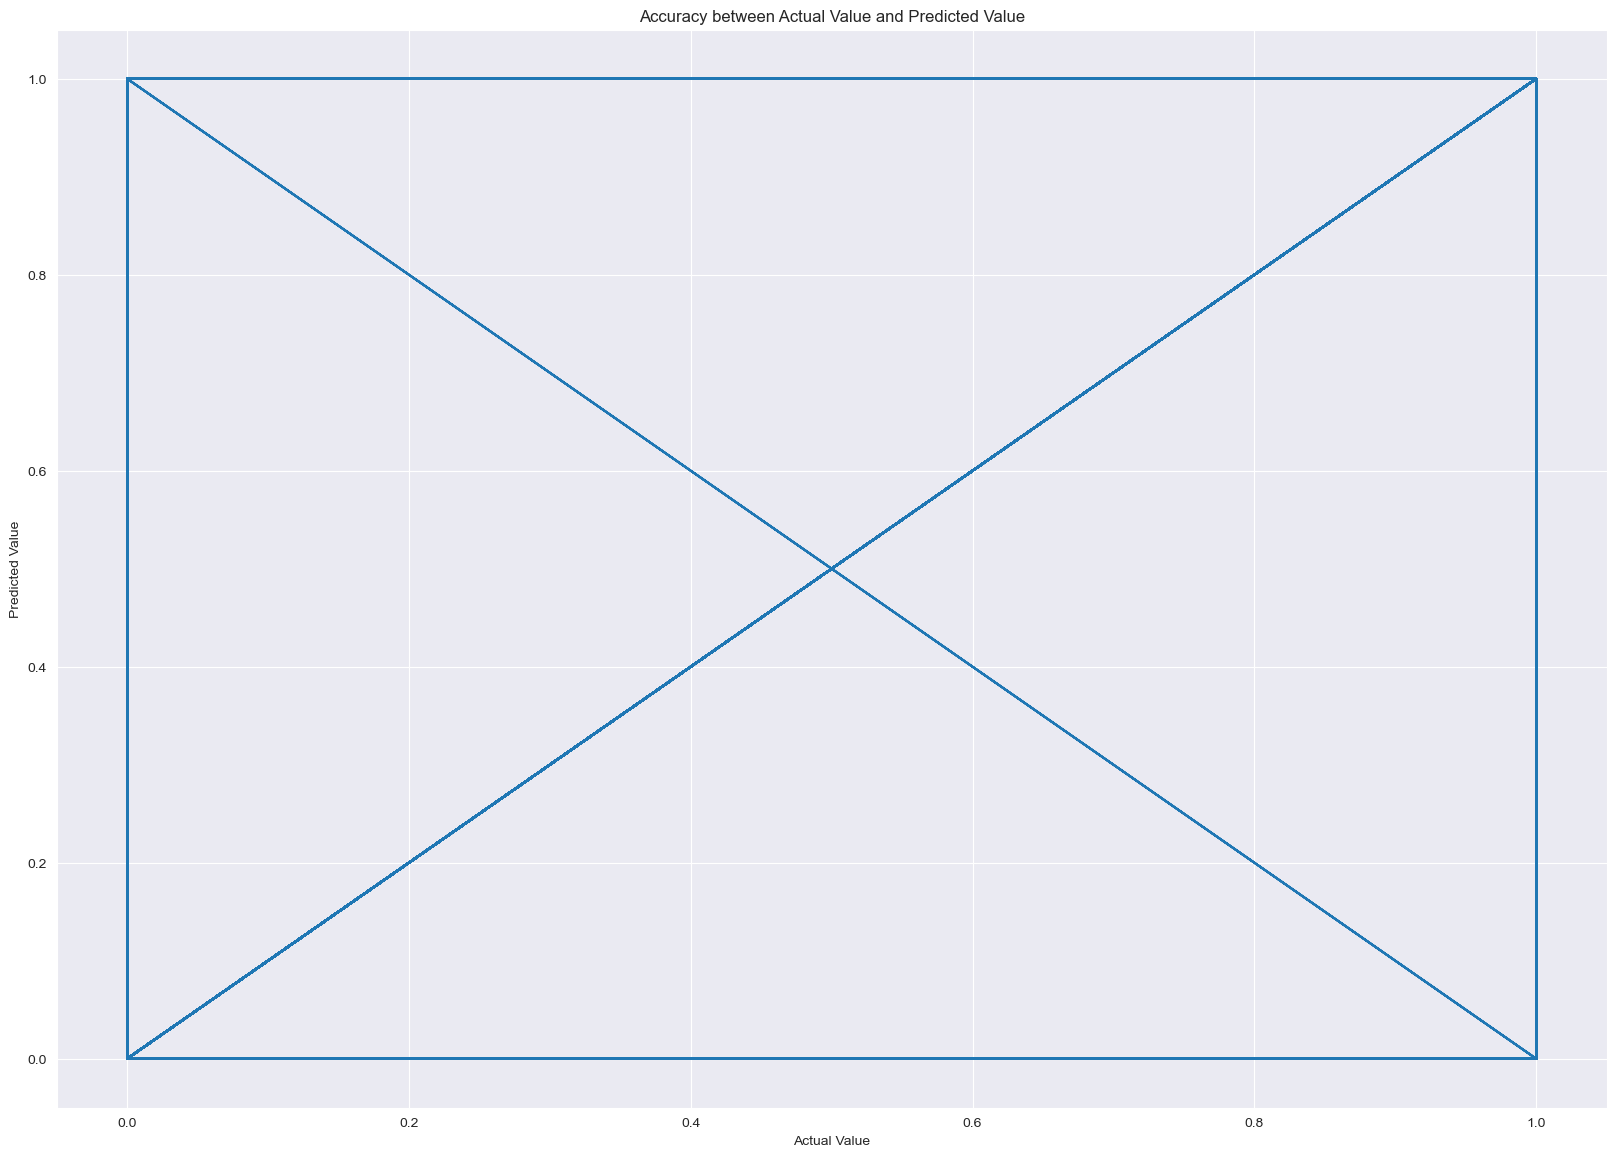

In [21]:
sns.set_style('darkgrid')
plt.plot(y,pred1)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Accuracy between Actual Value and Predicted Value')
plt.savefig('Accuracy between Actual Value and Predicted Value.png')
plt.show()